# Demo notebook

In [10]:
# Import basic libraries
from palmerpenguins import load_penguins
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import time
from sklearn.preprocessing import LabelEncoder
from torch.optim import Adam
import torch
import torch.nn as nn

In [13]:
# Import personalized libraries
from fuzz.src.capacity import *
from fuzz.src.choquet import *
from fuzz.src.norm import *
from fuzz.src.knn import *
from fuzz.src.sim import S1, S2, S3
from fuzz.src.nca import NCA
from fuzz.optim import *
from fuzz.utils import *
from fuzz.eval import leave_one_out
from fuzz.dataloader import *

## Random test

In [30]:
data, labels = dynamic_generate_positive_gaussian_data(
    dim=4,
    nb_classes=3,
    nb_points_per_class=100,
    seed=42
)
data = batch_norm(data)
data[:5]

array([[0.51793744, 0.        , 0.98738425, 1.        ],
       [0.89385216, 1.        , 0.28518444, 0.        ],
       [0.87203193, 0.71421072, 0.        , 1.        ],
       [0.65878335, 0.67334739, 1.        , 0.        ],
       [1.        , 0.43284706, 0.        , 0.42269002]])

In [4]:
choquet = Choquet(X=data[0], mu=generate_capacity(enumerate_permute_unit(data[0])))
print(choquet.choquet)
# choquet.Choquet_classic(verbose=True)

0.6829577134340568


In [5]:
mu=generate_capacity(enumerate_permute_unit(data[0]))
sim = S1(X=data[0], Y=data[10], mu=mu)
print(sim.score())

0.95928034189108


In [6]:
for i in range(10):
    sim = S1(X=data[0], Y=data[i], mu=mu)
    print(sim.score())

0.970149791413415
0.004193889097170564
0.2201897569032835
0.00792523817669903
0.5653215515204979
1.1796096389681858
0.7151298063857441
0.7623166444143178
0.00816066349829479
0.6974358830025682


In [7]:
knn = KNNFuzz(input_dimension=4, mu=mu)
knn.train(data, labels)

Leave one out avec k = 1
SimLevel1: 0.32666666666666666
SimLevel2: 0.27666666666666667
SimLevel3: 0.31333333333333335

Result in 9.2997 seconds.
Leave one out avec k = 2
SimLevel1: 0.32
SimLevel2: 0.31333333333333335
SimLevel3: 0.33

Result in 9.3100 seconds.
Leave one out avec k = 3
SimLevel1: 0.31333333333333335
SimLevel2: 0.3566666666666667
SimLevel3: 0.3433333333333333

Result in 9.1127 seconds.
Leave one out avec k = 4
SimLevel1: 0.33
SimLevel2: 0.3233333333333333
SimLevel3: 0.36333333333333334

Result in 9.2624 seconds.
Leave one out avec k = 5
SimLevel1: 0.31666666666666665
SimLevel2: 0.31
SimLevel3: 0.31333333333333335

Result in 9.0179 seconds.
Leave one out avec k = 6
SimLevel1: 0.29333333333333333
SimLevel2: 0.3233333333333333
SimLevel3: 0.33

Result in 9.1775 seconds.
Leave one out avec k = 7
SimLevel1: 0.27
SimLevel2: 0.27
SimLevel3: 0.32

Result in 9.0543 seconds.
Leave one out avec k = 8
SimLevel1: 0.31333333333333335
SimLevel2: 0.3333333333333333
SimLevel3: 0.3266666666

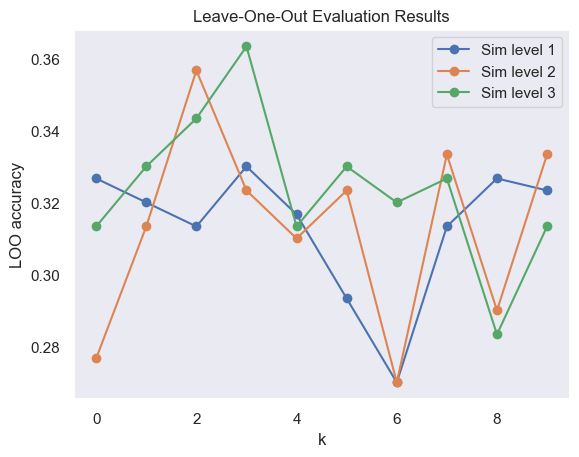

In [8]:
# LOO evaluation
# Define list for each sim level
l1 = []
l2 = []
l3 = []
k = 10

for k in range(1, k+1): 
    tic = time.time()
    mu = generate_capacity(enumerate_permute_unit(data[0]))

    print(f"Leave one out avec k = {k}")
    
    # SimLevel1
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data.shape[1],mu=mu, k=k, sim=S1), 
            DS = (data, labels)
        )
    l1.append(res)
    print(f"SimLevel1: {res}")
    # Sim level 2
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data.shape[1],mu=mu, k=k, sim=S2), 
            DS = (data, labels)
        )
    l2.append(res)
    print(f"SimLevel2: {res}")

    # Sim level 3
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data.shape[1],mu=mu, k=k, sim=S3), 
            DS = (data, labels)
        )
    l3.append(res)
    print(f"SimLevel3: {res}\n")

    toc = time.time()
    print(f"Result in {(toc-tic):0.4f} seconds.")

# Plot results
plt.plot(l1, label="Sim level 1", marker='o')
plt.plot(l2, label="Sim level 2", marker='o')
plt.plot(l3, label="Sim level 3", marker='o')

# Config additional params
plt.ylabel("LOO accuracy")
plt.xlabel("k")
plt.title("Leave-One-Out Evaluation Results")
plt.grid()
plt.legend()

In [ ]:
data

Epoch 1/150, Loss: -51.500000, Smoothed: -51.500000, LR: 0.001000
Epoch 5/150, Loss: -49.000000, Smoothed: -50.762650, LR: 0.000997
Epoch 10/150, Loss: -53.000000, Smoothed: -50.479482, LR: 0.000989
Epoch 15/150, Loss: -44.000000, Smoothed: -50.314839, LR: 0.000976
Epoch 20/150, Loss: -51.000000, Smoothed: -50.289555, LR: 0.000957
Epoch 25/150, Loss: -51.500000, Smoothed: -50.436809, LR: 0.000934
Epoch 30/150, Loss: -49.000000, Smoothed: -50.397331, LR: 0.000905
Epoch 35/150, Loss: -46.500000, Smoothed: -49.907300, LR: 0.000873
Epoch 40/150, Loss: -55.000000, Smoothed: -51.039712, LR: 0.000836
Epoch 45/150, Loss: -51.000000, Smoothed: -50.889439, LR: 0.000796
Epoch 50/150, Loss: -49.500000, Smoothed: -50.748580, LR: 0.000752
Epoch 55/150, Loss: -50.000000, Smoothed: -50.549354, LR: 0.000706
Epoch 60/150, Loss: -51.000000, Smoothed: -49.547338, LR: 0.000658
Epoch 65/150, Loss: -55.000000, Smoothed: -50.095818, LR: 0.000608
Epoch 70/150, Loss: -51.000000, Smoothed: -50.021579, LR: 0.0005

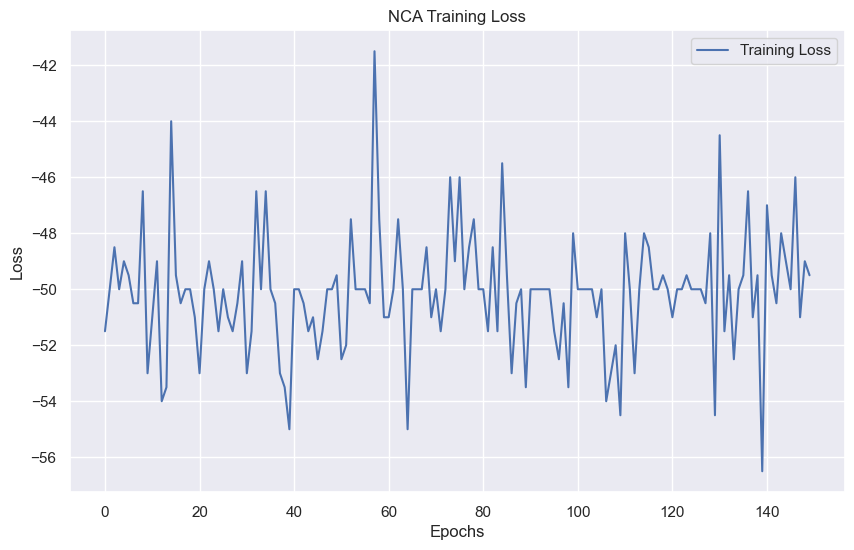

In [8]:
num_epochs = 150  # Increased epochs since convergence wasn't reached
nca = NCA(input_dim=data.shape[1], output_dim=2)
nca.train()
knn = KNNFuzz(input_dimension=2,mu=mu, k=1, sim=S1)



# Lower learning rate, add AMSGrad option
optimizer = torch.optim.Adam(nca.parameters(), lr=1e-3, weight_decay=1e-4, amsgrad=True)

# Use a more smooth learning rate schedule
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs, eta_min=1e-5)

# Increase batch size for stability
batch_size = 256  # Adjust based on your dataset size and memory constraints

# losses
losses = []
running_loss = 0.0  # For smoothed loss reporting

# Add gradient clipping
max_grad_norm = 1.0

for i in range(num_epochs):
    # Shuffle data at each epoch
    shuffle_idx = torch.randperm(len(data))
    shuffled_data = data[shuffle_idx]
    shuffled_labels = labels[shuffle_idx]
    
    epoch_losses = []
    
    # Process in batches
    for start_idx in range(0, len(shuffled_data), batch_size):
        end_idx = min(start_idx + batch_size, len(shuffled_data))
        batch_data = shuffled_data[start_idx:end_idx]
        batch_labels = shuffled_labels[start_idx:end_idx]
        
        # Forward pass
        Z = nca(batch_data)
        Z_numpy = Z.detach().numpy()
        
        # Train KNN on the current batch projection
        knn.train(Z_numpy, batch_labels)
        
        # Get predictions for loss calculation
        pred = [knn.predict(Z_numpy[i]) for i in range(len(Z_numpy))]
        
        # Calculate loss
        loss = nca.loss(Z, batch_labels, pred)
        epoch_losses.append(loss.item())
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        
        # Gradient clipping to prevent extreme updates
        torch.nn.utils.clip_grad_norm_(nca.parameters(), max_grad_norm)
        
        optimizer.step()
    
    # Calculate average loss for this epoch
    avg_epoch_loss = sum(epoch_losses) / len(epoch_losses)
    losses.append(avg_epoch_loss)
    
    # Exponential moving average for smoother loss reporting
    if i == 0:
        running_loss = avg_epoch_loss
    else:
        running_loss = 0.9 * running_loss + 0.1 * avg_epoch_loss
    
    # Update learning rate
    scheduler.step()
    
    # Print both actual and smoothed loss
    if (i+1) % 5 == 0 or i == 0:
        print(f"Epoch {i+1}/{num_epochs}, Loss: {avg_epoch_loss:.6f}, Smoothed: {running_loss:.6f}, LR: {scheduler.get_last_lr()[0]:.6f}")

# Visualization code for monitoring loss
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(len(losses)), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('NCA Training Loss')
plt.grid(True)
plt.legend()
plt.savefig('nca_training_loss.png')
plt.show()

In [18]:
class NCA(nn.Module):
    """
    Neighborhood Component Analysis (NCA) for dimensionality reduction
    and learning a distance metric.
    """
    def __init__(self, input_dim, output_dim):
        """
        Initialize NCA parameters.
        :param input_dim: Number of input features.
        :param output_dim: Number of output features (dimensions).
        """
        super(NCA, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        # Initialize A with small random values
        self.A = nn.Parameter(torch.randn(output_dim, input_dim) * 0.01)
        
    def forward(self, x):
        """
        Forward pass: transform input using the learned transformation matrix A.
        :param x: Input tensor of shape [n, input_dim]
        :return: Transformed output of shape [n, output_dim]
        """
        if not isinstance(x, torch.Tensor):
            x = torch.tensor(x, dtype=torch.float32)
        return torch.matmul(x, self.A.t())
    
    def compute_loss(self, x, labels):
        """
        Compute the NCA loss as described in the paper.
        :param x: Input data tensor of shape [n, input_dim]
        :param labels: Input labels tensor of shape [n]
        :return: NCA loss value
        """
        if not isinstance(x, torch.Tensor):
            x = torch.tensor(x, dtype=torch.float32)
        if not isinstance(labels, torch.Tensor):
            labels = torch.tensor(labels, dtype=torch.long)
            
        # Transform the input data
        transformed = self.forward(x)  # shape: [n, output_dim]
        
        # Compute squared Euclidean distances between all pairs
        n = transformed.size(0)
        sq_dists = torch.cdist(transformed, transformed, p=2.0).pow(2)  # shape: [n, n]
        
        # Compute stochastic neighbor probabilities (p_ij)
        # Set diagonal to inf to ensure p_ii = 0
        mask = torch.eye(n, dtype=torch.bool, device=transformed.device)
        sq_dists.masked_fill_(mask, float('inf'))
        
        # Compute p_ij (probability that i selects j as its neighbor)
        pij = torch.exp(-sq_dists)
        pij = pij / pij.sum(dim=1, keepdim=True)  # normalize each row
        
        # Compute p_i (probability that i will be correctly classified)
        # Create a mask for same-class examples
        same_class = (labels.unsqueeze(1) == labels.unsqueeze(0)).float()
        same_class.masked_fill_(mask, 0)  # exclude self
        
        # Sum p_ij over all j in the same class as i
        pi = (pij * same_class).sum(dim=1)  # shape: [n]
        
        # Maximize sum(pi) ⇒ minimize -sum(pi)
        loss = -torch.sum(pi)
        
        return loss
    
    def train_model(self, x, labels, learning_rate=0.01, num_epochs=100):
        """
        Train the NCA model.
        :param x: Input data
        :param labels: Input labels
        :param learning_rate: Learning rate for optimization
        :param num_epochs: Number of training epochs
        :return: List of loss values during training
        """
        if not isinstance(x, torch.Tensor):
            x = torch.tensor(x, dtype=torch.float32)
        if not isinstance(labels, torch.Tensor):
            labels = torch.tensor(labels, dtype=torch.long)
            
        optimizer = torch.optim.Adam([self.A], lr=learning_rate)
        losses = []
        
        for epoch in range(num_epochs):
            optimizer.zero_grad()
            loss = self.compute_loss(x, labels)
            loss.backward()
            optimizer.step()
            
            losses.append(loss.item())
            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")
                
        return losses
    
    def get_transformation_matrix(self):
        """
        Get the learned transformation matrix A.
        :return: Transformation matrix A as a numpy array.
        """
        return self.A.detach().numpy()

In [19]:
class NCAMetricKNN(KNN):
    """
    KNN classifier using a distance metric learned by NCA.
    """
    def __init__(self, input_dimension, k=3, output_dimension=None):
        """
        Initialize NCA-based KNN classifier.
        :param input_dimension: Input dimension of data
        :param k: Number of neighbors to consider
        :param output_dimension: Output dimension after transformation (defaults to input_dimension)
        """
        super().__init__(input_dimension, k)
        if output_dimension is None:
            output_dimension = input_dimension
        self.nca = NCA(input_dimension, output_dimension)
        self.transformed_desc_set = None
        
    def train(self, desc_set, label_set, learning_rate=0.01, num_epochs=100):
        """
        Train the model by first learning the transformation with NCA,
        then transforming the data.
        :param desc_set: Input descriptions
        :param label_set: Input labels
        :param learning_rate: Learning rate for NCA
        :param num_epochs: Number of epochs for NCA training
        :return: None
        """
        # First store the original data
        self.desc_set = desc_set
        self.label_set = label_set
        
        # Convert numpy arrays to torch tensors
        x_tensor = torch.tensor(desc_set, dtype=torch.float32)
        y_tensor = torch.tensor(label_set, dtype=torch.long)
        
        # Train the NCA model
        losses = self.nca.train_model(x_tensor, y_tensor, learning_rate, num_epochs)
        
        # Transform the training data using the learned transformation
        self.transformed_desc_set = self.nca.forward(x_tensor).detach().numpy()
        
        print(f"NCA training complete. Final loss: {losses[-1]:.4f}")
        
    def score(self, x):
        """
        Compute the score for input x by first transforming it using NCA.
        :param x: Input data point
        :return: Predicted label
        """
        # Transform the input using NCA
        if not isinstance(x, torch.Tensor):
            x_tensor = torch.tensor(x, dtype=torch.float32)
        else:
            x_tensor = x
            
        transformed_x = self.nca.forward(x_tensor).detach().numpy()
        
        # Calculate distances in the transformed space
        distances = np.sqrt(np.sum((self.transformed_desc_set - transformed_x) ** 2, axis=1))
        nearest_indices = np.argsort(distances)[:self.k]
        nearest_labels = self.label_set[nearest_indices]
        
        label_counts = Counter(nearest_labels)
        return max(label_counts.items(), key=lambda item: (item[1], -item[0]))[0]

In [20]:
knn = NCAMetricKNN(input_dimension=data.shape[1], k=3, output_dimension=2)

In [21]:
knn.train(data, labels, learning_rate=0.01, num_epochs=100)

Epoch 10/100, Loss: -99.3523
Epoch 20/100, Loss: -99.4243
Epoch 30/100, Loss: -99.5526
Epoch 40/100, Loss: -99.7151
Epoch 50/100, Loss: -99.8637
Epoch 60/100, Loss: -99.9677
Epoch 70/100, Loss: -100.0324
Epoch 80/100, Loss: -100.0749
Epoch 90/100, Loss: -100.1084
Epoch 100/100, Loss: -100.1402
NCA training complete. Final loss: -100.1402


In [27]:
class NCAFuzzKNN(KNNFuzz):
    """
    KNNFuzz classifier enhanced with NCA for metric learning.
    This class learns a transformation matrix that optimizes
    fuzzy similarity-based classification.
    """
    def __init__(self, input_dimension: int, mu: List[Capacity], k: int = 3, 
                 output_dimension: int = None, sim: FuzzSIM = S1):
        """
        Initialize NCA-enhanced Fuzzy KNN.
        
        Parameters:
        -----------
        input_dimension : int
            Dimension of input features
        mu : List[Capacity]
            List of capacity functions for fuzzy similarity
        k : int
            Number of neighbors to consider
        output_dimension : int
            Dimension of the transformed space (defaults to input_dimension)
        sim : FuzzSIM
            Fuzzy similarity measure to use (S1, S2, S3, etc.)
        """
        super().__init__(input_dimension=input_dimension, mu=mu, k=k, sim=sim)
        
        # Set output dimension (for dimensionality reduction if needed)
        if output_dimension is None:
            output_dimension = input_dimension
        self.output_dimension = output_dimension
        
        # Initialize NCA model
        self.nca = torch.nn.Module()
        # Initialize A with small random values
        self.nca.A = torch.nn.Parameter(torch.randn(output_dimension, input_dimension) * 0.01)
        
        # Store transformed data
        self.transformed_desc_set = None

    def transform(self, x):
        """
        Transform input data using the learned transformation matrix.
        
        Parameters:
        -----------
        x : np.ndarray or torch.Tensor
            Input data to transform
            
        Returns:
        --------
        np.ndarray
            Transformed data
        """
        if not isinstance(x, torch.Tensor):
            x_tensor = torch.tensor(x, dtype=torch.float32)
        else:
            x_tensor = x
            
        # Apply the transformation: x -> x * A^T
        transformed = torch.matmul(x_tensor, self.nca.A.t())
        return transformed.detach().numpy()
    
    def compute_pij(self, transformed_data, labels):
        """
        Compute the stochastic neighbor probabilities p_ij based on fuzzy similarities.
        
        Parameters:
        -----------
        transformed_data : torch.Tensor
            Data in the transformed space
        labels : torch.Tensor
            Class labels
            
        Returns:
        --------
        torch.Tensor
            Stochastic neighbor probability matrix
        """
        n = transformed_data.size(0)
        
        # Convert to numpy for fuzzy similarity calculation
        np_transformed = transformed_data.detach().numpy()
        
        # Compute similarity matrix using fuzzy similarity
        sim_matrix = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                if i != j:  # Exclude self-similarity
                    sim_matrix[i, j] = self.sim(np_transformed[i], np_transformed[j], self.mu).score()
        
        # Convert to torch tensor
        sim_tensor = torch.tensor(sim_matrix, dtype=torch.float32)
        
        # Apply softmax to get probabilities
        # We need to handle the diagonal separately (set to 0)
        mask = torch.eye(n, dtype=torch.bool)
        sim_tensor.masked_fill_(mask, float('-inf'))  # Set diagonal to -inf
        
        # Apply softmax row-wise
        pij = torch.softmax(sim_tensor, dim=1)
        
        return pij
    
    def nca_loss(self, x, labels):
        """
        Compute the NCA loss based on fuzzy similarities.
        
        Parameters:
        -----------
        x : torch.Tensor
            Input data
        labels : torch.Tensor
            Class labels
            
        Returns:
        --------
        torch.Tensor
            NCA loss value
        """
        # Transform the data
        transformed = torch.matmul(x, self.nca.A.t())
        
        # Compute p_ij (probability that i selects j as its neighbor)
        pij = self.compute_pij(transformed, labels)
        
        # Create a mask for same-class examples
        n = x.size(0)
        same_class = (labels.unsqueeze(1) == labels.unsqueeze(0)).float()
        mask = torch.eye(n, dtype=torch.bool)
        same_class.masked_fill_(mask, 0)  # Exclude self
        
        # Sum p_ij over all j in the same class as i
        pi = (pij * same_class).sum(dim=1)  # shape: [n]
        
        # Maximize sum(pi) ⇒ minimize -sum(pi)
        loss = -torch.sum(pi)
        
        return loss
    
    def train(self, desc_set: np.ndarray, label_set: np.ndarray, 
              learning_rate: float = 0.01, num_epochs: int = 100, 
              batch_size: int = None) -> None:
        """
        Train the NCA-enhanced KNNFuzz model.
        First learn the optimal transformation, then store the transformed data.
        
        Parameters:
        -----------
        desc_set : np.ndarray
            Training data descriptions
        label_set : np.ndarray
            Training data labels
        learning_rate : float
            Learning rate for optimization
        num_epochs : int
            Number of training epochs
        batch_size : int
            Batch size for mini-batch training (None for full batch)
        """
        # First store the original data
        self.desc_set = desc_set
        self.label_set = label_set
        
        # Convert numpy arrays to torch tensors
        x_tensor = torch.tensor(desc_set, dtype=torch.float32)
        y_tensor = torch.tensor(label_set, dtype=torch.long)
        
        # Setup optimizer
        optimizer = torch.optim.Adam([self.nca.A], lr=learning_rate)
        
        # Train the NCA model
        n_samples = len(desc_set)
        
        # Use either mini-batch or full batch
        if batch_size is None:
            batch_size = n_samples
            
        losses = []
        
        for epoch in range(num_epochs):
            epoch_loss = 0
            
            # Shuffle the data for mini-batch training
            indices = torch.randperm(n_samples)
            
            # Mini-batch training
            for start_idx in range(0, n_samples, batch_size):
                # Get mini-batch indices
                batch_indices = indices[start_idx:min(start_idx + batch_size, n_samples)]
                
                # Get batch data
                batch_x = x_tensor[batch_indices]
                batch_y = y_tensor[batch_indices]
                
                # Zero the gradients
                optimizer.zero_grad()
                
                # Compute loss
                loss = self.nca_loss(batch_x, batch_y)
                
                # Backward pass and optimization
                loss.backward()
                optimizer.step()
                
                epoch_loss += loss.item() * len(batch_indices)
            
            # Average loss for the epoch
            avg_loss = epoch_loss / n_samples
            losses.append(avg_loss)
            
            # Print progress
            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")
        
        # Transform the training data using the learned transformation
        self.transformed_desc_set = self.transform(x_tensor)
        
        print(f"NCA training complete. Final loss: {losses[-1]:.4f}")
    
    def score(self, x: np.ndarray):
        """
        Calculate the similarity score for the input x in the transformed space.
        
        Parameters:
        -----------
        x : np.ndarray
            Input description
            
        Returns:
        --------
        The predicted label based on the highest similarity score
        """
        if len(x) != self.input_dimension:
            raise ValueError(f"Dimension of x should be {self.input_dimension}, but got {len(x)}")
        
        # Transform the input using NCA
        transformed_x = self.transform(x)
        
        # Calculate similarity in the transformed space
        similarity = [self.sim(transformed_x, self.transformed_desc_set[j], self.mu).score() 
                     for j in range(len(self.transformed_desc_set))]
        
        similarity = np.array(similarity)
        
        # Check closest points - highest similarity
        nearest_indices = np.argsort(similarity)[-self.k:][::-1]
        nearest_labels = self.label_set[nearest_indices]
        
        # Count the occurrences of each label among the nearest neighbors
        label_counts = Counter(nearest_labels)
        return max(label_counts.items(), key=lambda item: (item[1], -item[0]))[0]
    
    def get_transformation_matrix(self):
        """
        Get the learned transformation matrix A.
        
        Returns:
        --------
        np.ndarray
            Transformation matrix
        """
        return self.nca.A.detach().numpy()

In [33]:
# If your data has 3 features:
nca_fuzz_knn = NCAFuzzKNN(
    input_dimension=4,  # Must match your data's feature count
    mu=mu,
    k=3,
    output_dimension=5,
    sim=S1
)

# Print the shapes to verify
print(f"Data shape: {data.shape}")
print(f"Model input dimension: {nca_fuzz_knn.input_dimension}")
print(f"Model A matrix shape: {nca_fuzz_knn.nca.A.shape}")

# Then train
nca_fuzz_knn.train(
    desc_set=data,
    label_set=labels,
    learning_rate=0.01,
    num_epochs=100
)

Data shape: (300, 4)
Model input dimension: 4
Model A matrix shape: torch.Size([5, 4])


ValueError: Capacity not found for the given values.

## Test on iris

In [9]:
iris = load_iris(as_frame=True)  # returns a dict-like object
df = iris.frame  # get as pandas DataFrame

X = df.drop(columns='target')  # features
y = df['target']  # target

# Turn into array
X = np.array(X)
y = np.array(y)

In [10]:
# Hyperparameters
dim = X.shape[1]  # number of features
nb_classes = len(np.unique(y))  # number of classes

# Normalize data
data_norm = batch_norm(X)
data_labels = sync_lst_to_float_lst(y)
print(f"Normalized data: {data_norm.shape[0]} samples in {data_norm.shape[1]}D space.")

Normalized data: 150 samples in 4D space.


Leave one out avec k = 1
SimLevel1: 0.6666666666666666
SimLevel2: 0.5933333333333334
SimLevel3: 0.6666666666666666

Result in 4.2133 seconds.
Leave one out avec k = 2
SimLevel1: 0.6666666666666666
SimLevel2: 0.6
SimLevel3: 0.7666666666666667

Result in 4.4744 seconds.
Leave one out avec k = 3
SimLevel1: 0.6666666666666666
SimLevel2: 0.66
SimLevel3: 0.6666666666666666

Result in 4.3545 seconds.
Leave one out avec k = 4
SimLevel1: 0.6666666666666666
SimLevel2: 0.6733333333333333
SimLevel3: 0.6666666666666666

Result in 4.4851 seconds.
Leave one out avec k = 5
SimLevel1: 0.6666666666666666
SimLevel2: 0.6733333333333333
SimLevel3: 0.6666666666666666

Result in 4.2145 seconds.
Leave one out avec k = 6
SimLevel1: 0.6666666666666666
SimLevel2: 0.6666666666666666
SimLevel3: 0.6666666666666666

Result in 4.7386 seconds.
Leave one out avec k = 7
SimLevel1: 0.6666666666666666
SimLevel2: 0.6666666666666666
SimLevel3: 0.6733333333333333

Result in 4.3616 seconds.
Leave one out avec k = 8
SimLevel1:

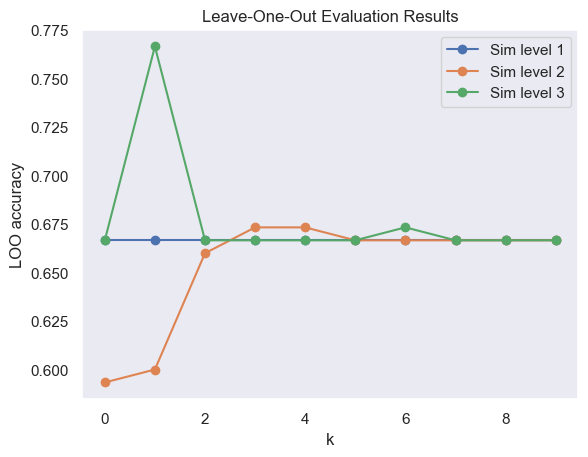

In [11]:
# LOO evaluation
# Define list for each sim level
l1 = []
l2 = []
l3 = []
k = 10

for k in range(1, k+1): 
    tic = time.time()
    mu = generate_capacity(enumerate_permute_unit(data_norm[0]))

    print(f"Leave one out avec k = {k}")
    
    # SimLevel1
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S1), 
            DS = (data_norm, data_labels)
        )
    l1.append(res)
    print(f"SimLevel1: {res}")
    # Sim level 2
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S2), 
            DS = (data_norm, data_labels)
        )
    l2.append(res)
    print(f"SimLevel2: {res}")

    # Sim level 3
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S3), 
            DS = (data_norm, data_labels)
        )
    l3.append(res)
    print(f"SimLevel3: {res}\n")

    toc = time.time()
    print(f"Result in {(toc-tic):0.4f} seconds.")

# Plot results
plt.plot(l1, label="Sim level 1", marker='o')
plt.plot(l2, label="Sim level 2", marker='o')
plt.plot(l3, label="Sim level 3", marker='o')

# Config additional params
plt.ylabel("LOO accuracy")
plt.xlabel("k")
plt.title("Leave-One-Out Evaluation Results")
plt.grid()
plt.legend()

## Test penguins

In [12]:
penguins = load_penguins()
penguins

# Encode
le = LabelEncoder()
le.fit(penguins['island'])
penguins['island'] = le.transform(penguins['island'])

le.fit(penguins['sex'])
penguins['sex'] = le.transform(penguins['sex'])

le.fit(penguins['species'])
penguins['species'] = le.transform(penguins['species'])

# Remove missing values
penguins = penguins.dropna()  # remove rows with missing values
X = penguins.drop(columns='species')  # features
y = penguins['species']  # target

# Turn into array
X = np.array(X)
y = np.array(y)

In [13]:
# Hyperparameters
dim = X.shape[1]  # number of features
nb_classes = len(np.unique(y))  # number of classes

# Normalize data
data_norm = batch_norm(X)
data_labels = sync_lst_to_float_lst(y)
print(f"Normalized data: {data_norm.shape[0]} samples in {data_norm.shape[1]}D space.")

Normalized data: 342 samples in 7D space.


Leave one out avec k = 1
SimLevel1: 0.5321637426900585
SimLevel2: 0.5818713450292398
SimLevel3: 0.4824561403508772
Result in 221.0498 seconds.

Leave one out avec k = 2
SimLevel1: 0.6695906432748538
SimLevel2: 0.5964912280701754
SimLevel3: 0.695906432748538
Result in 215.7454 seconds.

Leave one out avec k = 3
SimLevel1: 0.4327485380116959
SimLevel2: 0.52046783625731
SimLevel3: 0.5058479532163743
Result in 216.6631 seconds.

Leave one out avec k = 4
SimLevel1: 0.5175438596491229
SimLevel2: 0.4678362573099415
SimLevel3: 0.6140350877192983
Result in 212.4999 seconds.

Leave one out avec k = 5
SimLevel1: 0.5672514619883041
SimLevel2: 0.4327485380116959
SimLevel3: 0.6432748538011696
Result in 213.0915 seconds.

Leave one out avec k = 6
SimLevel1: 0.6140350877192983
SimLevel2: 0.41228070175438597
SimLevel3: 0.6842105263157895
Result in 225.5965 seconds.

Leave one out avec k = 7
SimLevel1: 0.4678362573099415
SimLevel2: 0.39473684210526316
SimLevel3: 0.4766081871345029
Result in 221.6927 sec

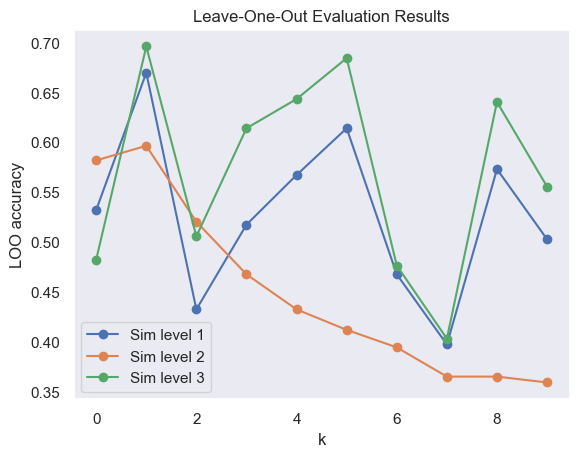

In [14]:
# LOO evaluation
# Define list for each sim level
l1 = []
l2 = []
l3 = []
k = 10

for k in range(1, k+1): 
    tic = time.time()
    mu = generate_capacity(enumerate_permute_unit(data_norm[0]))

    print(f"Leave one out avec k = {k}")
    
    # SimLevel1
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S1), 
            DS = (data_norm, data_labels)
        )
    l1.append(res)
    print(f"SimLevel1: {res}")
    # Sim level 2
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S2), 
            DS = (data_norm, data_labels)
        )
    l2.append(res)
    print(f"SimLevel2: {res}")

    # Sim level 3
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S3), 
            DS = (data_norm, data_labels)
        )
    l3.append(res)
    print(f"SimLevel3: {res}")

    toc = time.time()
    print(f"Result in {(toc-tic):0.4f} seconds.\n")

# Plot results
plt.plot(l1, label="Sim level 1", marker='o')
plt.plot(l2, label="Sim level 2", marker='o')
plt.plot(l3, label="Sim level 3", marker='o')

# Config additional params
plt.ylabel("LOO accuracy")
plt.xlabel("k")
plt.title("Leave-One-Out Evaluation Results")
plt.grid()
plt.legend()

## PySwarms

In [ ]:
# Example parameters
n_particles = 30
dimensions = data.shape[1]  # number of features
options = {
    'c1': 0.5,    # cognitive parameter
    'c2': 0.3,    # social parameter
    'w': 0.9      # inertia parameter
}
pso_type = "global"  # or "local" for local best PSO

# Load your data and labels here
# Example:
# data = np.load('your_data.npy')
# labels = np.load('your_labels.npy')

knn = KNNFuzz(input_dimension=dimensions, mu=generate_capacity(enumerate_permute_unit(data[0])), k=5, sim=S1)

# Create PSO optimizer
pso = PSO(n_particles, dimensions, options, (data, labels), knn, pso_type)

# Run optimization
best_cost, best_mu = pso.optimize(fitness_function, n_iters=100)

# Apply softmax to the best result to get the final capacity values
final_capacity = softmax(best_mu)

print(f"Best cost: {-best_cost}")  # Convert back to accuracy
print(f"Best capacity parameters: {final_capacity}")

# Generate final capacity from the optimized parameters
final_capacity_obj = generate_capacity(enumerate_permute_unit(final_capacity))

tmp = []
for i in range(len(final_capacity_obj)):
    print(f"Class {i}: {final_capacity_obj[i].mu}")
    tmp.append(final_capacity_obj[i].mu)

print(f"Final capacity: {tmp}")

2025-05-09 14:42:33,750 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:  21%|██        |21/100, best_cost=-0.33